# ECAL data plotter

Make plots of the original data.

In [113]:
from utils import data_dir

import os
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
task2label = {
    "scalar1": r"$h_2\rightarrow\pi^0\pi^0$",
    "axion1": r"$a\rightarrow\gamma\gamma$",
    "axion2": r"$a\rightarrow3\pi^0$"
}

In [9]:
jets = {}
for particle in ["axion1", "gamma", "pi0"]:
    f = h5py.File(f"{data_dir}/h5/{particle}_40-250GeV_100k.h5")
    jets[particle] = f

In [10]:
f.keys()

<KeysViewHDF5 ['energy', 'layer_0', 'layer_1', 'layer_2', 'layer_3', 'overflow']>

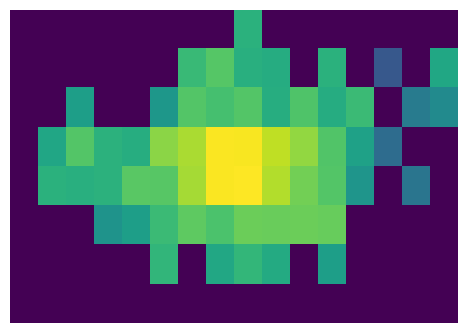

In [115]:
from matplotlib.colors import LogNorm

for layer in [f"layer_{i}" for i in range(4)]:
    for particle in ["axion1", "gamma", "pi0"]:
        plt.clf()
        plt.rcParams.update({'font.size': 18})
        plt.imshow(
            jets[particle][layer][0].T * 1000,
            aspect="auto",
            extent=[-0.2, 0.2, -0.02, 0.02],
            norm="symlog"
        )
        # plt.colorbar(pad=0)
        plt.xlabel(r"$\phi$")
        plt.ylabel(r"$\eta$")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.axis('off')
        os.makedirs(f"./generated_figures/noaxis", exist_ok=True)
        plt.savefig(f"./generated_figures/noaxis/{particle}_{layer}_1GeV_40-250GeV_100k_noaxis.pdf", bbox_inches="tight")